In [11]:
## Import the relevant libraries into the environment
import numpy as np                ## linear algebra
import pandas as pd               ## data processing, dataset file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt   ## data visualization & graphical plotting
import seaborn as sns             ## to visualize random distributions
import plotly.express as px       ## data visualization & graphical plotting
import squarify                   ## Treemap plots

%matplotlib inline
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode

pd.options.display.float_format = '{:.2f}'.format  ## limiting the decimals in the output to 2 

import warnings                    ## Filter warnings
warnings.filterwarnings('ignore')

In [27]:
import pandas as pd

# Path file CSV
file_path = r'C:\Users\yafiz\Downloads\Documents\earthquake_1995-2023.csv'

try:
    # Membaca file CSV ke dalam DataFrame
    df = pd.read_csv(file_path)
    
    # Menampilkan 5 baris pertama untuk verifikasi
    print("File berhasil dibaca. Menampilkan 5 baris pertama:")
    print(df.head())
    
    # Menampilkan informasi tambahan, seperti shape dan tipe data
    print(f"\nJumlah baris dan kolom: {df.shape}")
    print("\nInformasi tipe data dan non-null values:")
    print(df.info())

except FileNotFoundError:
    print(f"Error: File tidak ditemukan di path '{file_path}'. Pastikan file dan path sudah benar.")
except pd.errors.EmptyDataError:
    print("Error: File CSV kosong.")
except pd.errors.ParserError:
    print("Error: Format file tidak sesuai dengan CSV. Periksa isi file.")
except Exception as e:
    print(f"Error: Terjadi kesalahan yang tidak terduga. Detail: {e}")


File berhasil dibaca. Menampilkan 5 baris pertama:
                                      title  magnitude         date_time  cdi  \
0          M 6.5 - 42 km W of Sola, Vanuatu       6.50  16-08-2023 12:47    7   
1  M 6.5 - 43 km S of Intipucá, El Salvador       6.50  19-07-2023 00:22    8   
2  M 6.6 - 25 km ESE of Loncopué, Argentina       6.60  17-07-2023 03:05    7   
3     M 7.2 - 98 km S of Sand Point, Alaska       7.20  16-07-2023 06:48    6   
4                  M 7.3 - Alaska Peninsula       7.30  16-07-2023 06:48    0   

   mmi   alert  tsunami  sig net  nst  dmin    gap magType  depth  latitude  \
0    4   green        0  657  us  114  7.18  25.00     mww 192.96    -13.88   
1    6  yellow        0  775  us   92  0.68  40.00     mww  69.73     12.81   
2    5   green        0  899  us   70  1.63  28.00     mww 171.37    -38.19   
3    6   green        1  860  us  173  0.91  36.00     mww  32.57     54.38   
4    5     NaN        1  820  at   79  0.88 172.80      Mi  21.00  

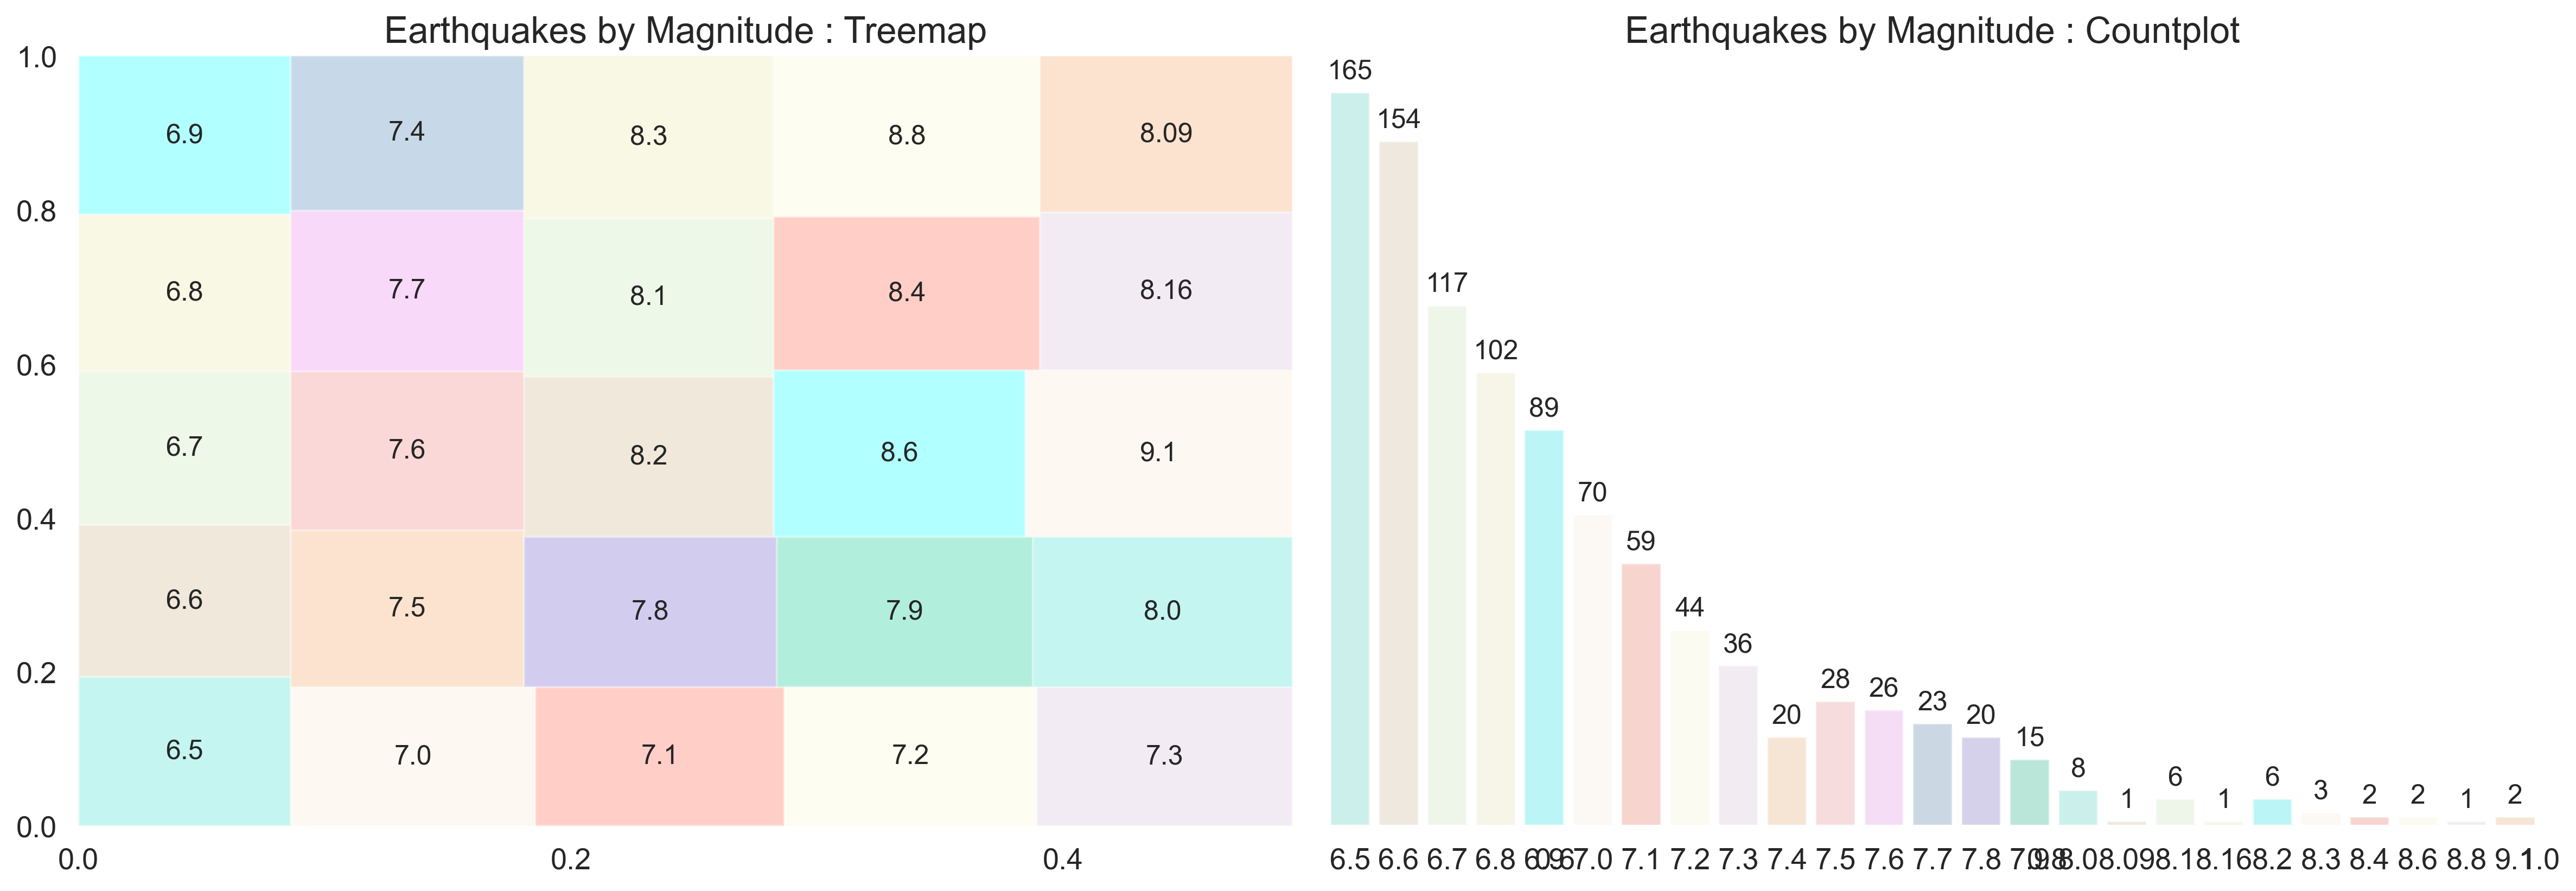

In [28]:
## Let's visualise the Earthquakes by Magnitude, to understand it in a better way

sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':13,'ytick.labelsize':13, 'figure.autolayout':True, 'figure.dpi':300, 'savefig.dpi':300})
my_col = ('#40E0D0', '#D2B48C','#c7e9b4', '#EEE8AA','#00FFFF','#FAEBD7','#FF6347', '#FAFAD2', '#D8BFD8','#F4A460','#F08080', '#EE82EE', '#4682B4','#6A5ACD', '#00C78C')

plt.subplots(figsize=(16,6))

plt.subplot(1,2,1)

plt.title('Earthquakes by Magnitude : Treemap',fontsize=16)
labels = df['magnitude'].value_counts().index.get_level_values(0).tolist()
sizes = df['magnitude'].value_counts().reset_index().magnitude.values.tolist()

squarify.plot(sizes=sizes, label=labels, color=my_col, alpha=0.3)
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Earthquakes by Magnitude : Countplot', fontsize=16)
ax = sns.countplot(x='magnitude', data=df, palette=my_col, alpha=0.3)
for p in ax.patches: 
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+ p.get_width()/2, p.get_height() + 2), ha='center', va='bottom')
plt.ylabel(None), plt.yticks([]), plt.xlabel(None)
        
plt.show()

- **6.5 magnitude** has been recorded in highest number of events, followed by 6.6, 6.7, 6.8 6.9, 7.0, and so on.

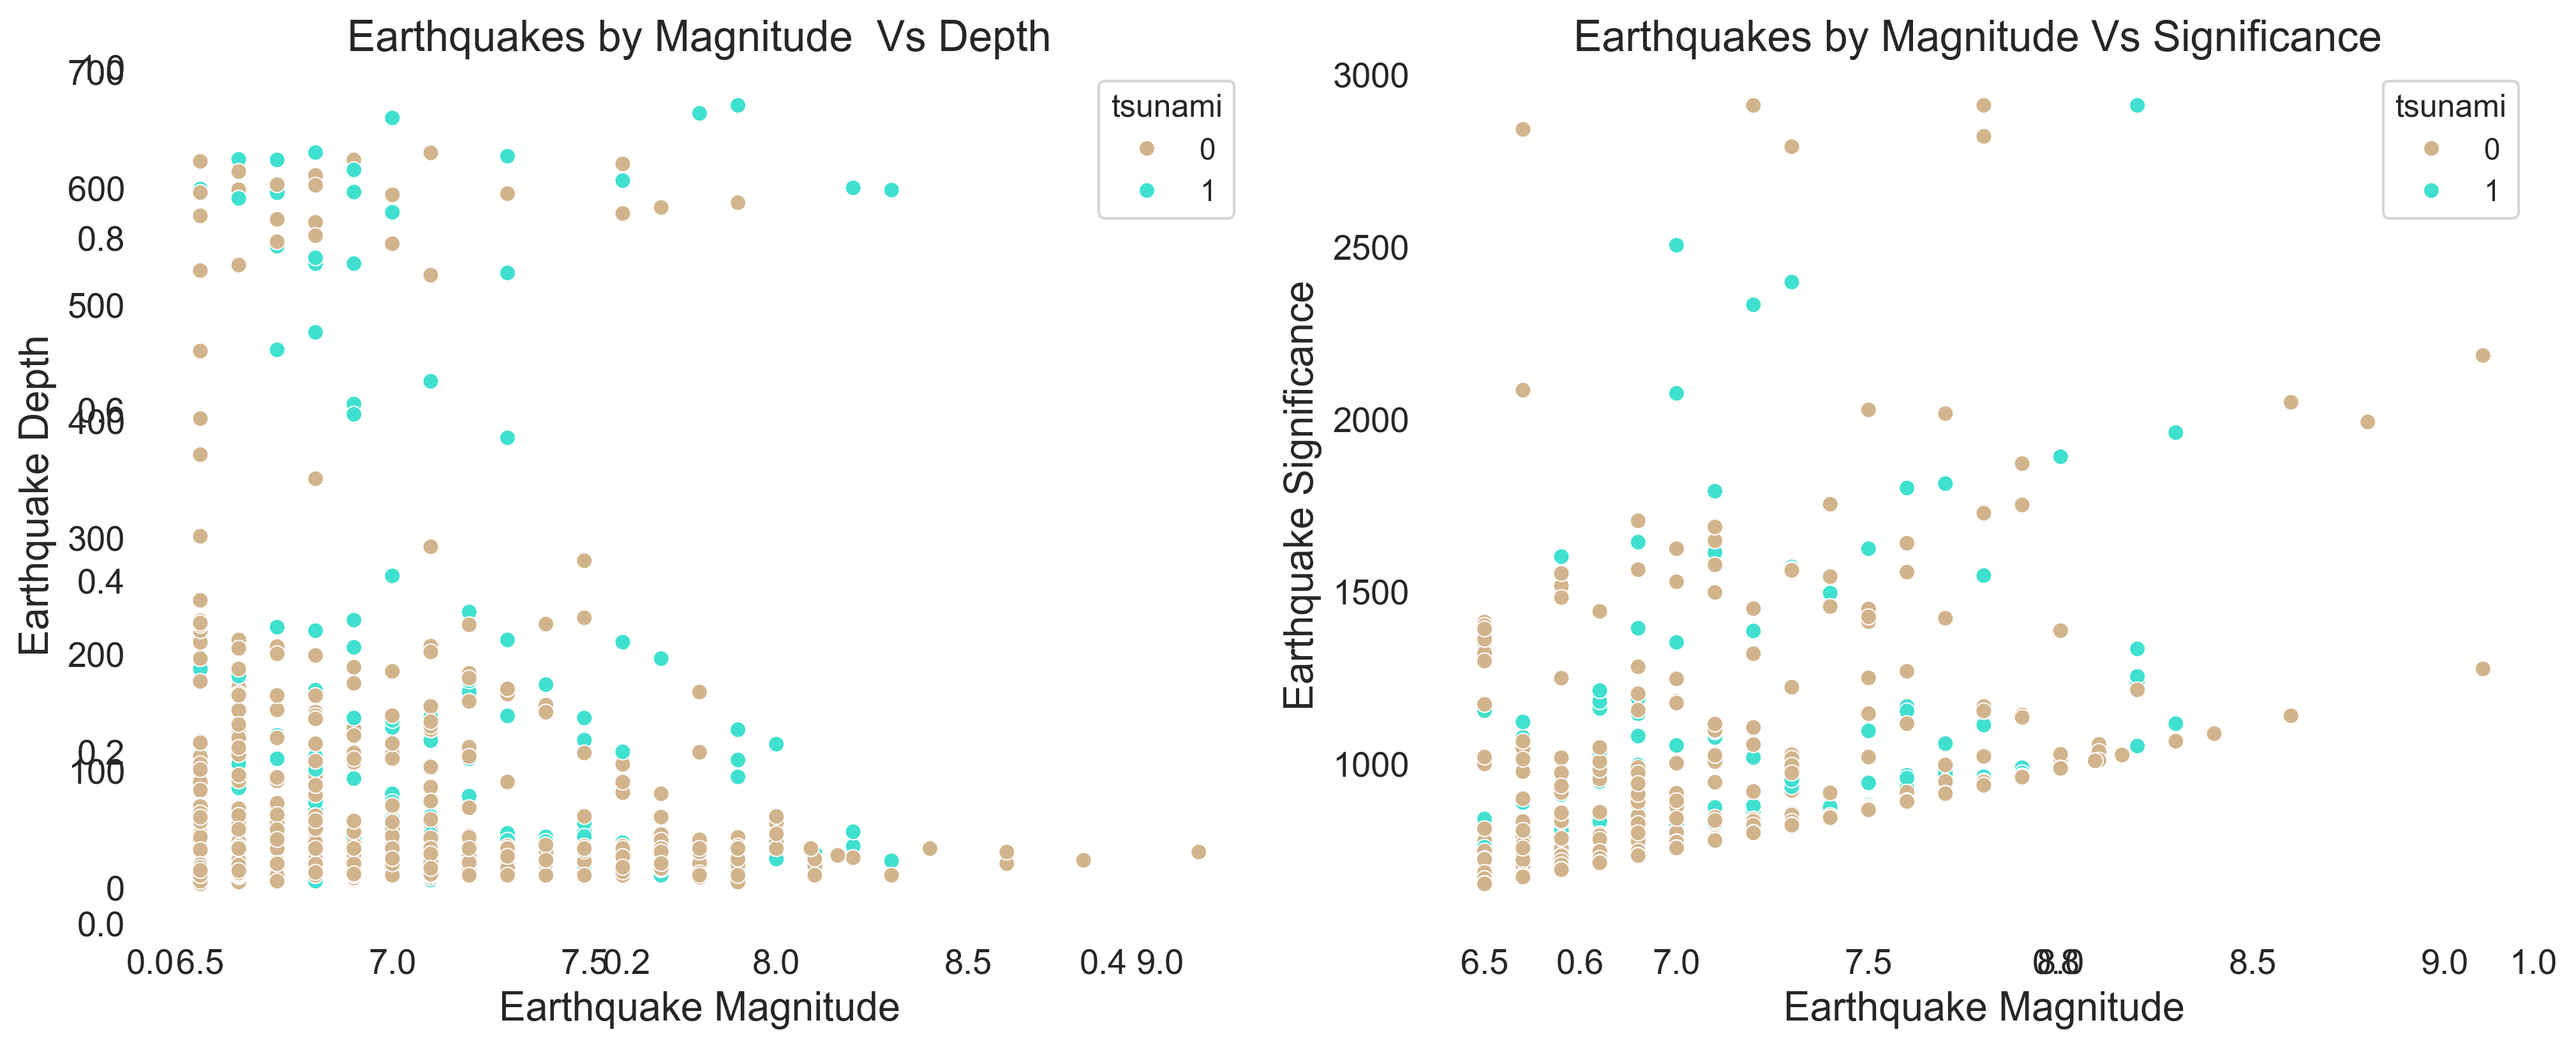

In [29]:
## Let's understand the relationship between magnitude vs depth and magnitude vs Significance

plt.subplots(figsize=(14,6))
my_pal = ('#D2B48C','#40E0D0')
          
plt.subplot(1,2,1)
plt.title('Earthquakes by Magnitude  Vs Depth',fontsize=16)
sns.scatterplot(data=df, x='magnitude', y='depth', hue='tsunami', palette=my_pal)
plt.ylabel('Earthquake Depth', fontsize=15)
plt.xlabel('Earthquake Magnitude', fontsize=15)

plt.subplot(1,2,2)
plt.title('Earthquakes by Magnitude Vs Significance ',fontsize=16)
sns.scatterplot(data=df, x='magnitude', y='sig', hue='tsunami', palette=my_pal)
plt.ylabel('Earthquake Significance', fontsize=15)
plt.xlabel('Earthquake Magnitude', fontsize=15)

plt.show()

- As such there is **not much correlation** between earthquake magnitude and depth, and the tsunami occurence. 
- However, there appears to be **a certain degree of correlation** between earthquake magnitude and earthquake significance.

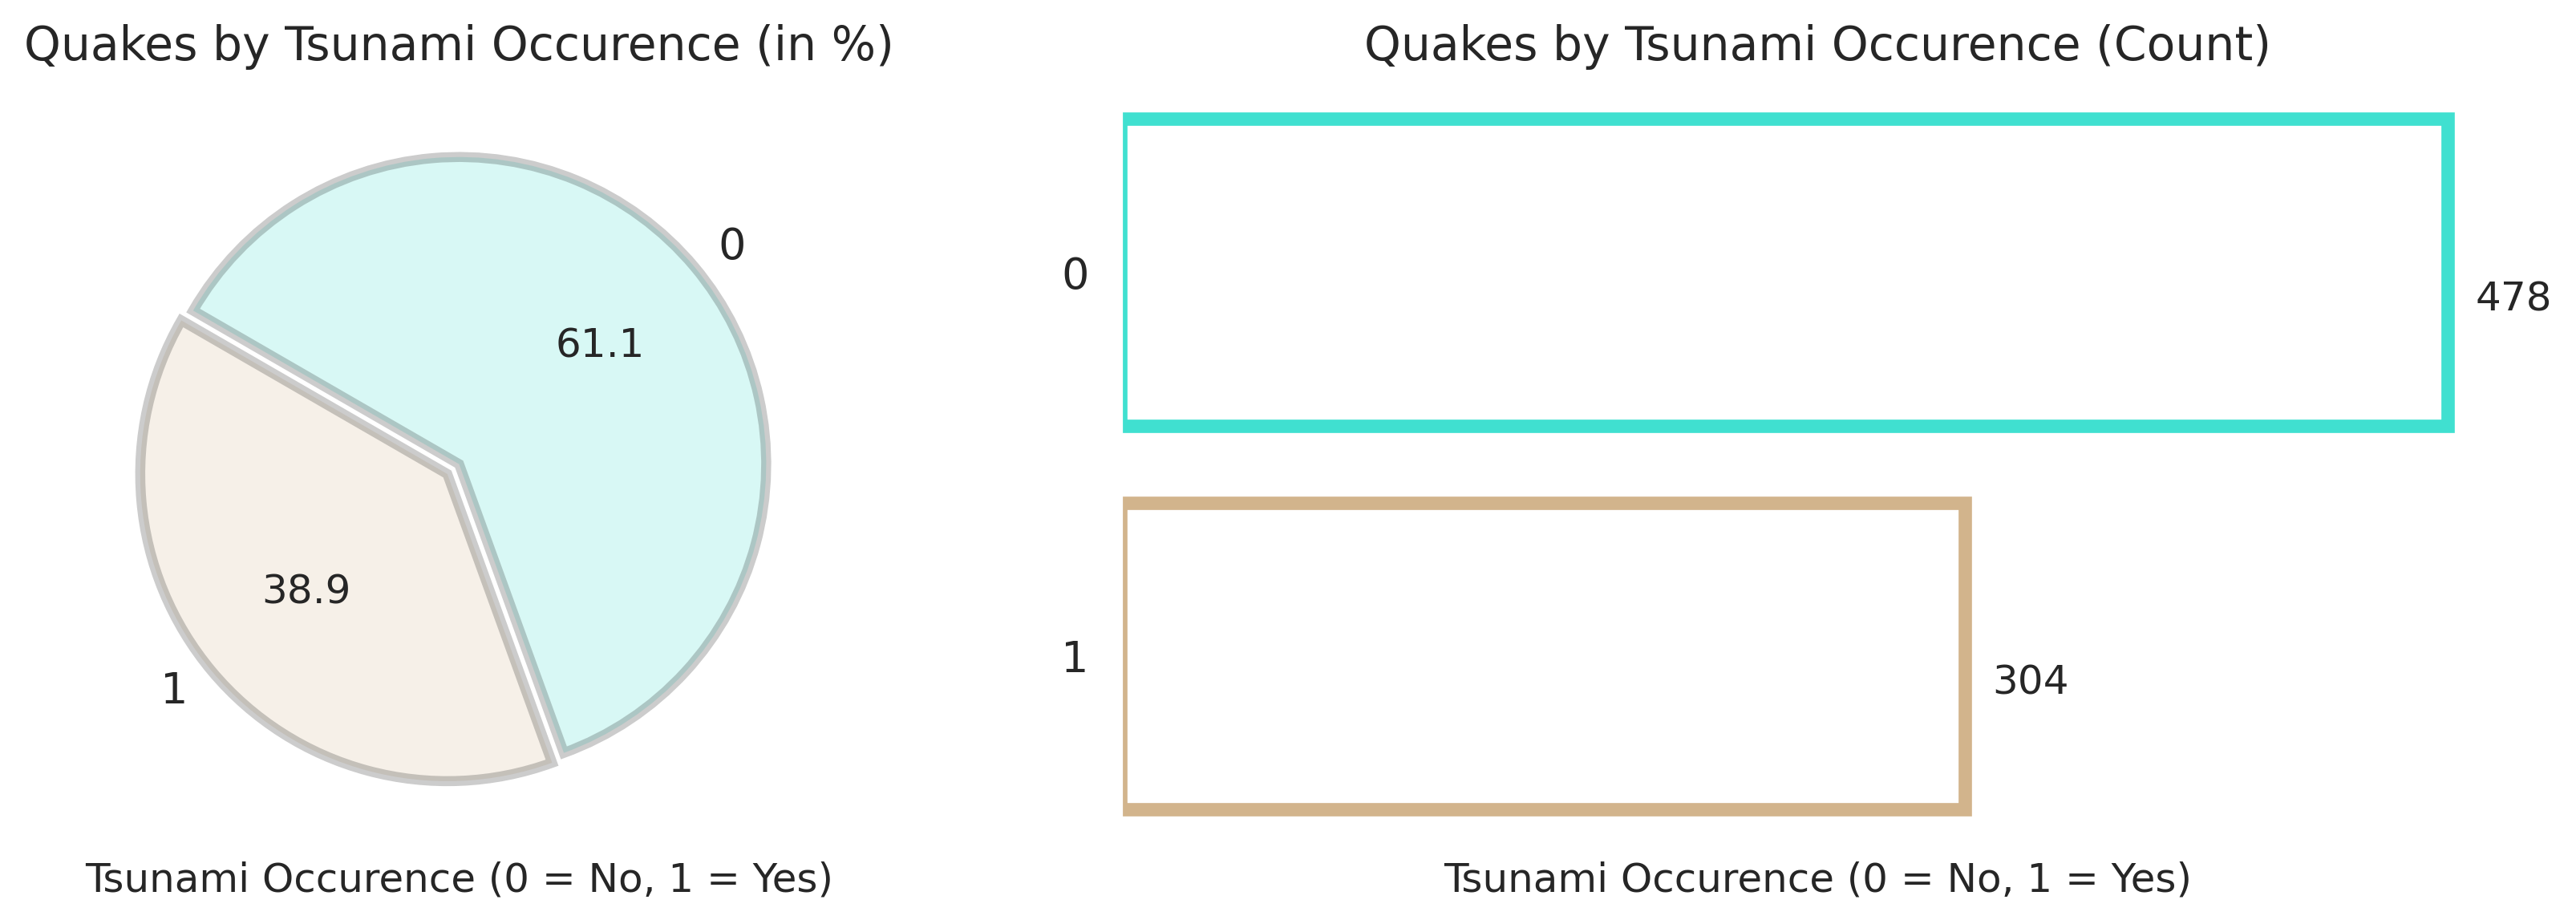

In [11]:
## Understand Tsunami Occurence during earthquake events

plt.subplots(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('Quakes by Tsunami Occurence (in %)',fontsize=14)
my_xpl = [0.0, 0.05]
df['tsunami'].value_counts().plot(kind='pie', colors=my_col, explode=my_xpl, legend=None, ylabel='', counterclock=False, startangle=150, wedgeprops={'alpha':0.2, 'edgecolor' : 'black','linewidth': 3, 'antialiased': True}, autopct='%1.1f')
plt.xlabel('Tsunami Occurence (0 = No, 1 = Yes)',fontsize=12)

plt.subplot(1,2,2)
plt.title('Quakes by Tsunami Occurence (Count)',fontsize=14)
ax = sns.countplot(y='tsunami', data=df, facecolor=(1,1,1,1), linewidth=4, edgecolor=sns.color_palette(my_col, 2), order=df['tsunami'].value_counts().index)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_width()),  (p.get_x() + p.get_width() + 10, p.get_y()+0.5))

plt.xlabel('Tsunami Occurence (0 = No, 1 = Yes)',fontsize=12)
plt.xticks([]), plt.ylabel(None)
    
plt.show()

- Here, "1" stands for earthquakes occured in oceanic regions causing tsunami and other oceanic events.
- As per the data we have, around **39%** of the earthquakes have **occured in the oceanic areas**. 
- On the otherhand, about **61%** earthquakes have occured in non-oceanic areas, i.e., **on land**. 

In [47]:
## Analyse the data by Year, Month, Day of the month, and Hour of the day.

## Make a new Date, Year, Month, Day, & Hour columns from the 'date_time' column for our analysis

df['Date'] = pd.to_datetime(df['date_time']).dt.date
df['Year'] = pd.to_datetime(df['date_time']).dt.year
df['Month'] = pd.to_datetime(df['date_time']).dt.month
df['Day'] = pd.to_datetime(df['date_time']).dt.day
df['Hour'] = pd.to_datetime(df['date_time']).dt.hour

## Check the new columns we have created in our dataset

df[['date_time', 'Date', 'Year', 'Month', 'Day', 'Hour']].head(5)

date_time        Date  Year  Month  Day  Hour
0  16-08-2023 12:47  2023-08-16  2023      8   16    12
1  19-07-2023 00:22  2023-07-19  2023      7   19     0
2  17-07-2023 03:05  2023-07-17  2023      7   17     3
3  16-07-2023 06:48  2023-07-16  2023      7   16     6
4  16-07-2023 06:48  2023-07-16  2023      7   16     6

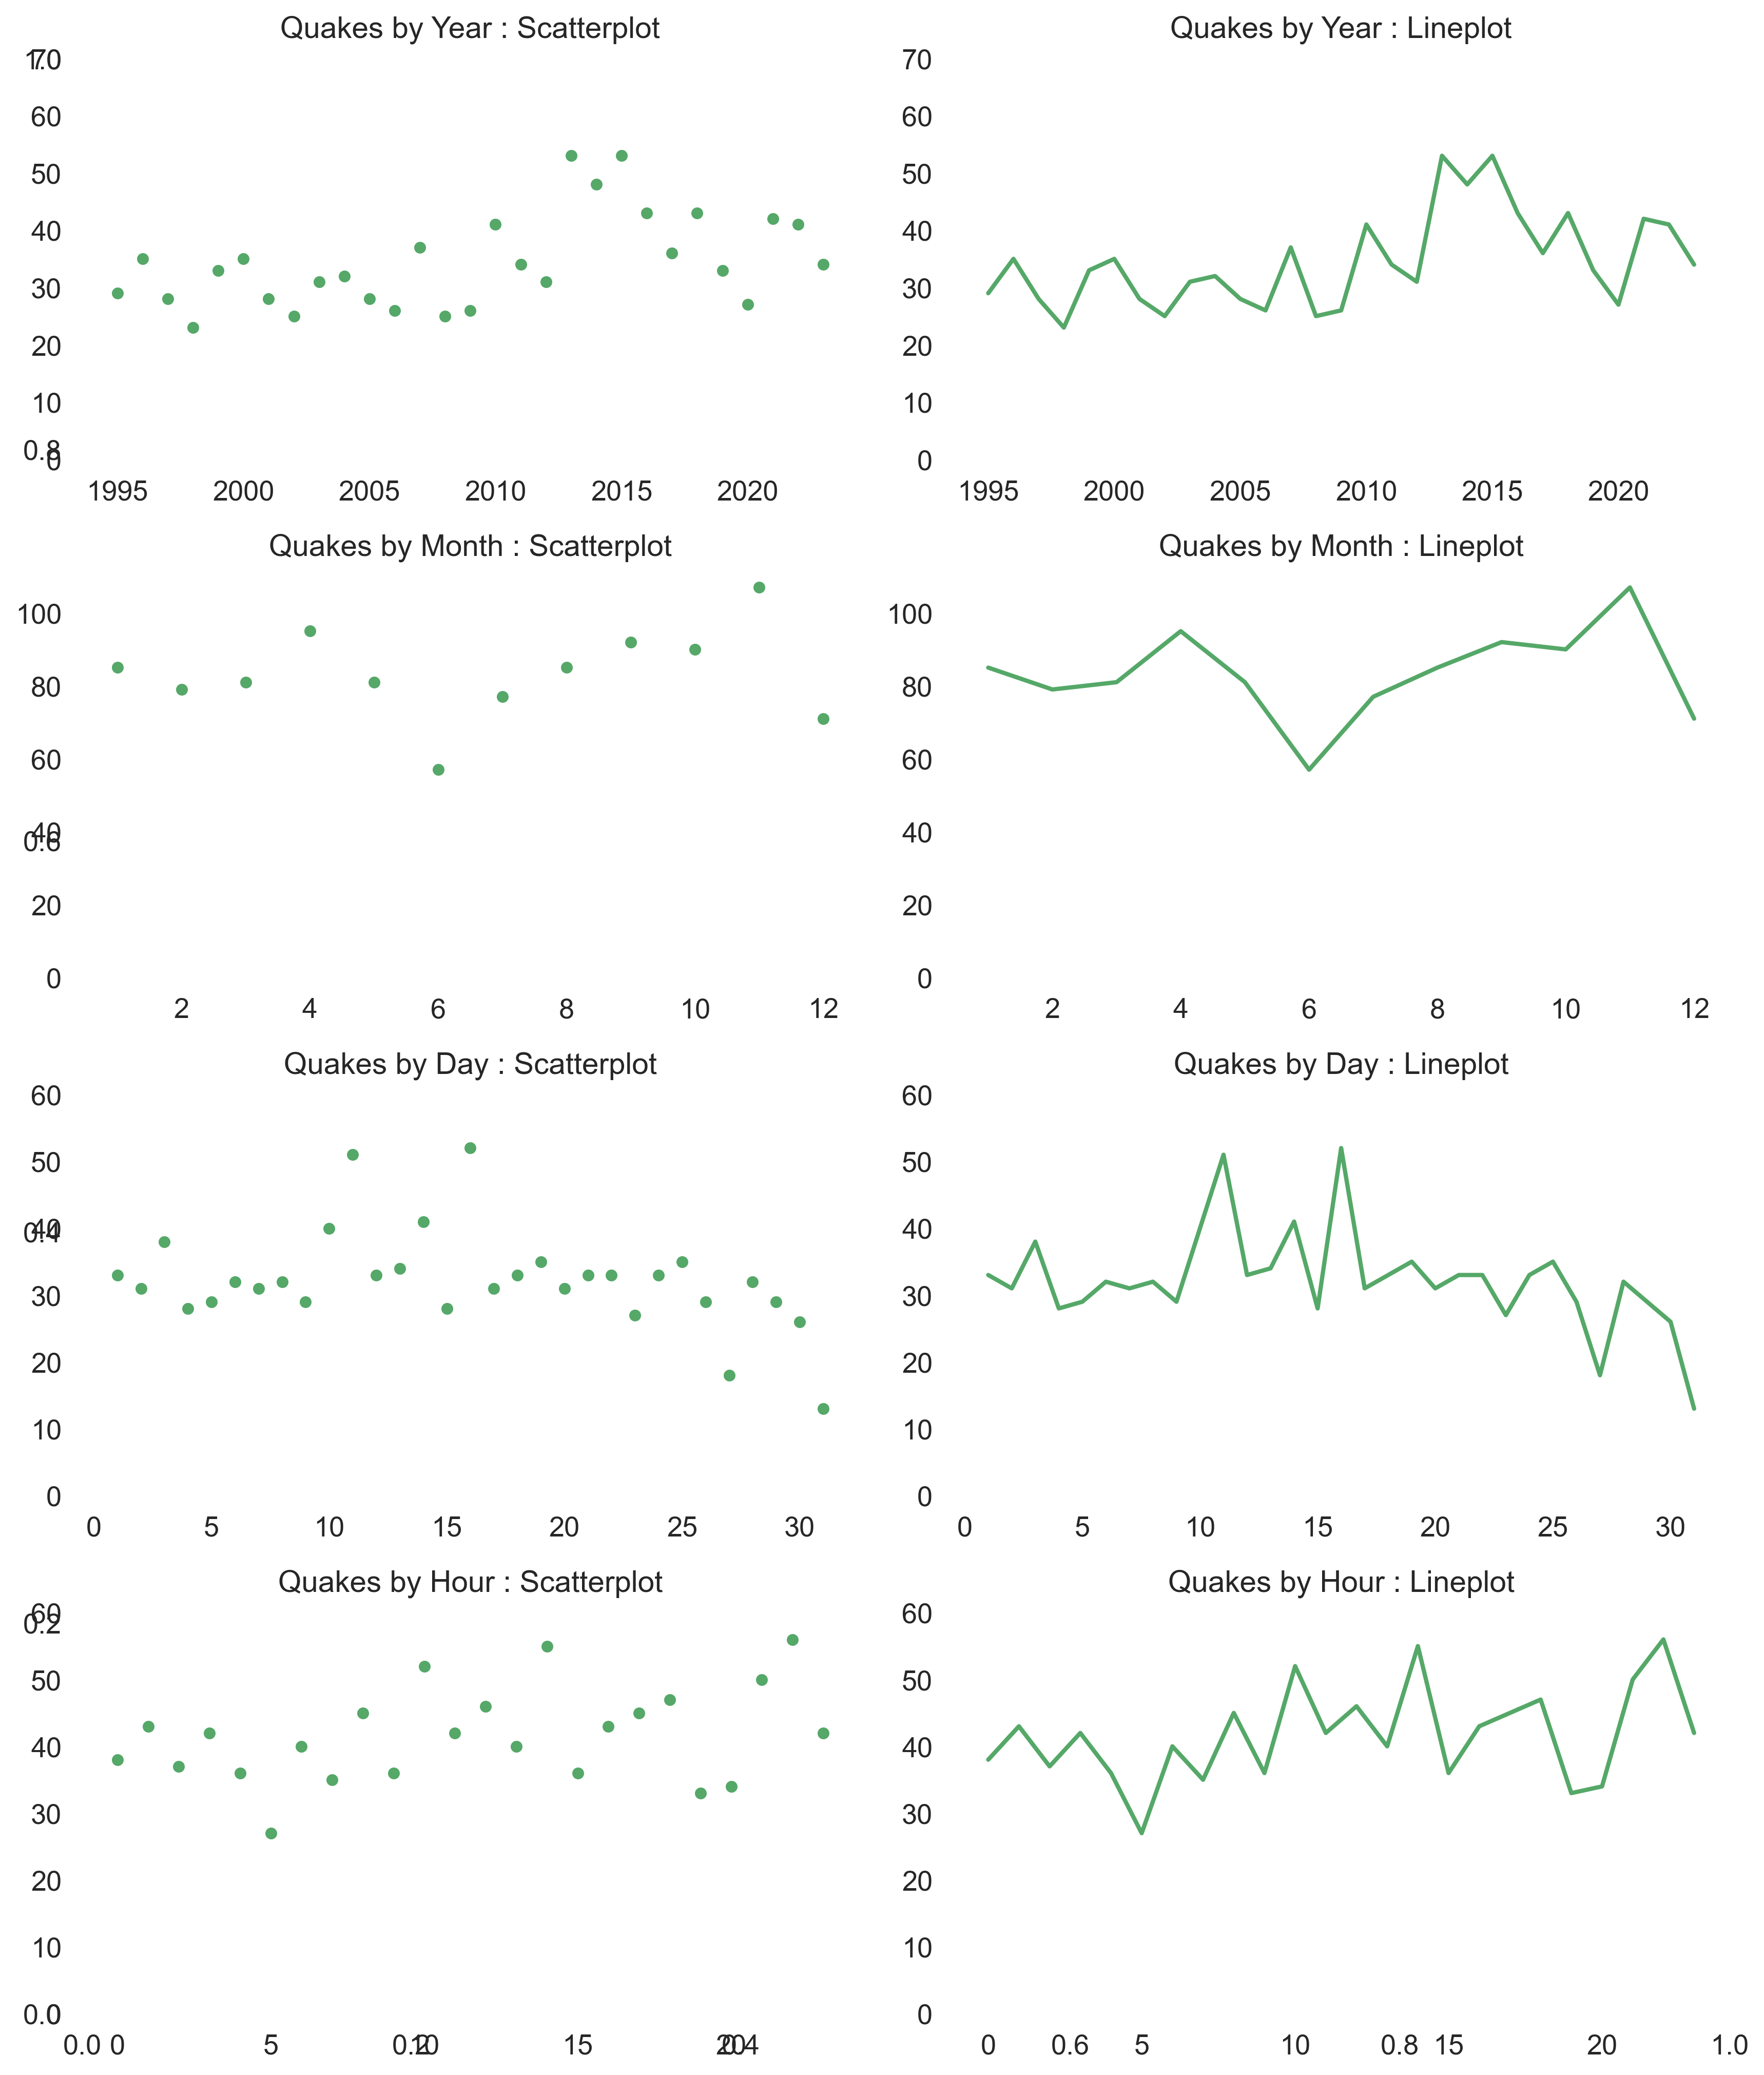

In [48]:
## Now, let's visualise the earthquake events by Year, Month, Day, and Hour with Scatterplots & Lineplots

plt.subplots(figsize=(12,14))

## By Year
###########

plt.subplot(421)
plt.title('Quakes by Year : Scatterplot', pad = 10, fontsize = 14)
sns.scatterplot(data = df['Year'].value_counts().sort_values(), color='g')
plt.ylim(0, 70), plt.ylabel(None), plt.xlabel(None)

plt.subplot(422)
plt.title('Quakes by Year : Lineplot', pad = 10, fontsize = 14)
sns.lineplot(data = df['Year'].value_counts().sort_values(), color='g', linewidth = 2)
plt.ylim(0, 70), plt.ylabel(None), plt.xlabel(None)

## By Month
###########

plt.subplot(423)
plt.title('Quakes by Month : Scatterplot', pad = 10, fontsize = 14)
sns.scatterplot(data = df['Month'].value_counts().sort_values(), color='g')
plt.ylim(0, 110), plt.ylabel(None), plt.xlabel(None)

plt.subplot(424)
plt.title('Quakes by Month : Lineplot', pad = 10, fontsize = 14)
sns.lineplot(data = df['Month'].value_counts().sort_values(), color='g', linewidth = 2)
plt.ylim(0, 110), plt.ylabel(None), plt.xlabel(None)

## By Day
###########

plt.subplot(425)
plt.title('Quakes by Day : Scatterplot', pad = 10, fontsize = 14)
sns.scatterplot(data = df['Day'].value_counts().sort_values(), color='g')
plt.ylim(0, 60), plt.ylabel(None), plt.xlabel(None)

plt.subplot(426)
plt.title('Quakes by Day : Lineplot', pad = 10, fontsize = 14)
sns.lineplot(data = df['Day'].value_counts().sort_values(), color='g', linewidth = 2)
plt.ylim(0, 60), plt.ylabel(None), plt.xlabel(None)

## By Hour
###########

plt.subplot(427)
plt.title('Quakes by Hour : Scatterplot', pad = 10, fontsize = 14)
sns.scatterplot(data = df['Hour'].value_counts().sort_values(), color='g')
plt.ylim(0, 60), plt.ylabel(None), plt.xlabel(None)

plt.subplot(428)
plt.title('Quakes by Hour : Lineplot', pad = 10, fontsize = 14)
sns.lineplot(data = df['Hour'].value_counts().sort_values(), color='g', linewidth = 2)
plt.ylim(0, 60), plt.ylabel(None), plt.xlabel(None)

plt.show()

**From the above graphs, it can be determined that the** 

- The number of earthquakes events was fairly high in **2013, 2014 & 2015**.
- **November** was the month when most earthquakes have occured.
- By hour of the day, occurence of earthquakes is **lowest between 4 a.m. and 5 a.m.** (early morning), whereas it is **highest between 9 p.m. and 10 p.m.** (night time).

In [30]:
## Now we'll visualise the data by country
## But the country column has many missing values, we'll fix them and plot the data

## Let's fill the missing values in country column with information available in the location column

## Create a new dataframe using the location information in the earthquake dataset
## Make it into a two column dataframe by moving the last word of the location information in to the second (last) column
## Now the second column of new dataframe has country name, which we use to fill in our original dataset

df_r = df['location'].str.split(pat=',', n=1, expand=True)
print(df_r.head(5))                       ## View the new dataframe

## fill the missing country data, with country names in country column of df_r (df_r[1] is the country column)

df['country'] = df['country'].fillna(df_r[1])  
print('\n', 'Missing values in the refined country column are : ', df['country'].isna().sum())

                  0             1
0              Sola       Vanuatu
1          Intipucá   El Salvador
2          Loncopué     Argentina
3        Sand Point        Alaska
4  Alaska Peninsula          None

 Missing values in the refined country column are :  54


In [16]:
# Making a fresh dataframe by droping null values from 'country','location','continent' columns

df_country=df.dropna(subset=['country','location','continent'], how='all')

In [45]:
## We try to fill location names as missing country names, and refine it later

df_country['country'] = df_country['country'].fillna(df_country['location'])

In [46]:
## Let's have a look at the country names in the country column

df_country['country'].unique()

array(['Vanuatu region', 'Intipucá, El Salvador', 'Argentina',
       'Sand Point, Alaska', 'Alaska Peninsula',
       'Codrington, Antigua and Barbuda', 'Tonga', 'Fiji region',
       'Colombia', 'New Caledonia', 'Hihifo, Tonga', 'Indonesia',
       'Kermadec Islands, New Zealand', 'Russian Federation (the)',
       'Papua New Guinea', 'Afghanistan', 'Ecuador',
       'Kermadec Islands region', 'Port-Olry, Vanuatu', 'Tajikistan',
       'Turkiye', 'Solomon Islands', 'Bengkulu, Indonesia',
       'Neiafu, Tonga', 'Panama', 'Mexico', 'Taiwan', 'Isangel, Vanuatu',
       'CHINA', 'New Zealand region', 'Philippines', 'Brazil', 'Peru',
       'Masachapa, Nicaragua', 'Tadine, New Caledonia', 'Namie, Japan',
       'Nikolski, Alaska', 'Pólis, Cyprus', 'Hirara, Japan', 'USA',
       'Jiquilillo, Nicaragua', 'Antarctica',
       'South Sandwich Islands region', 'Haiti', 'Perryville, Alaska',
       'Pondaguitan, Philippines', 'Burica, Panama',
       'Alo, Wallis and Futuna', 'Sinabang, Indone

- The column requires refinements, as **repeated** and **inappropriate** country names and **extra spaces** are seen at several places.
- For example, **Fiji is appearing in four forms** –'Fiji', 'the Fiji Islands', ' Fiji', 'Fiji region'– which  we can club them into one single label. 
- Similarly, country names like **United States of America**, and **United Kingdom of Great Britain and Northern Ireland (the)**, can be shortened as **USA**, and **UK**, respectively. 
- We retain remote Island territories like **Svalbard and Jan Mayen**, **Wallis and Futuna**, **Northern Mariana Islands** as-is, without clubbing them with the country they belong. 

In [49]:
## Now we refine the column, for analysing and visualising the data country-wise

## First we remove all the extra spaces in the country column (in fact, the code will erase all the extra spaces across the dataset)

df_country = df_country.applymap(lambda x: x.strip() if isinstance(x, str) else x)

## Next we refine some country names

df_country.replace({'country': {"the Fiji Islands" : "Fiji region", "Fiji" : "Fiji region", 
                                "the Kermadec Islands" : "New Zealand region", "the Loyalty Islands" : "New Caledonia", 
                                "Vanuatu" : "Vanuatu region", "South Sandwich Islands" : "South Sandwich Islands region", 
                                "South Georgia and the South Sandwich Islands" : "South Sandwich Islands region", 
                                "Prince Edward Islands region" : "Canada", "Okhotsk" : "Russia region", 
                                "off the west coast of northern Sumatra" : "Indonesia", 
                                "Philippine Islands region" : "Philippines", 
                                "the Kuril Islands" : "Kuril Islands", 
                                "United Kingdom of Great Britain and Northern Ireland (the)": "UK", 
                                "People's Republic of China": "CHINA", "United States of America": "USA", 
                                "Alaska": "USA", "Aleutian Islands, Alaska" : "USA", "California" : "USA", 
                                "India" : "India region", "Russia" : "Russia region", "New Zealand" : "New Zealand region", 
                                "Japan region" : "Japan"}}, inplace=True)

df_country['country'].unique()

array(['Vanuatu region', 'Intipucá, El Salvador', 'Argentina',
       'Sand Point, Alaska', 'Alaska Peninsula',
       'Codrington, Antigua and Barbuda', 'Tonga', 'Fiji region',
       'Colombia', 'New Caledonia', 'Hihifo, Tonga', 'Indonesia',
       'Kermadec Islands, New Zealand', 'Russian Federation (the)',
       'Papua New Guinea', 'Afghanistan', 'Ecuador',
       'Kermadec Islands region', 'Port-Olry, Vanuatu', 'Tajikistan',
       'Turkiye', 'Solomon Islands', 'Bengkulu, Indonesia',
       'Neiafu, Tonga', 'Panama', 'Mexico', 'Taiwan', 'Isangel, Vanuatu',
       'CHINA', 'New Zealand region', 'Philippines', 'Brazil', 'Peru',
       'Masachapa, Nicaragua', 'Tadine, New Caledonia', 'Namie, Japan',
       'Nikolski, Alaska', 'Pólis, Cyprus', 'Hirara, Japan', 'USA',
       'Jiquilillo, Nicaragua', 'Antarctica',
       'South Sandwich Islands region', 'Haiti', 'Perryville, Alaska',
       'Pondaguitan, Philippines', 'Burica, Panama',
       'Alo, Wallis and Futuna', 'Sinabang, Indone

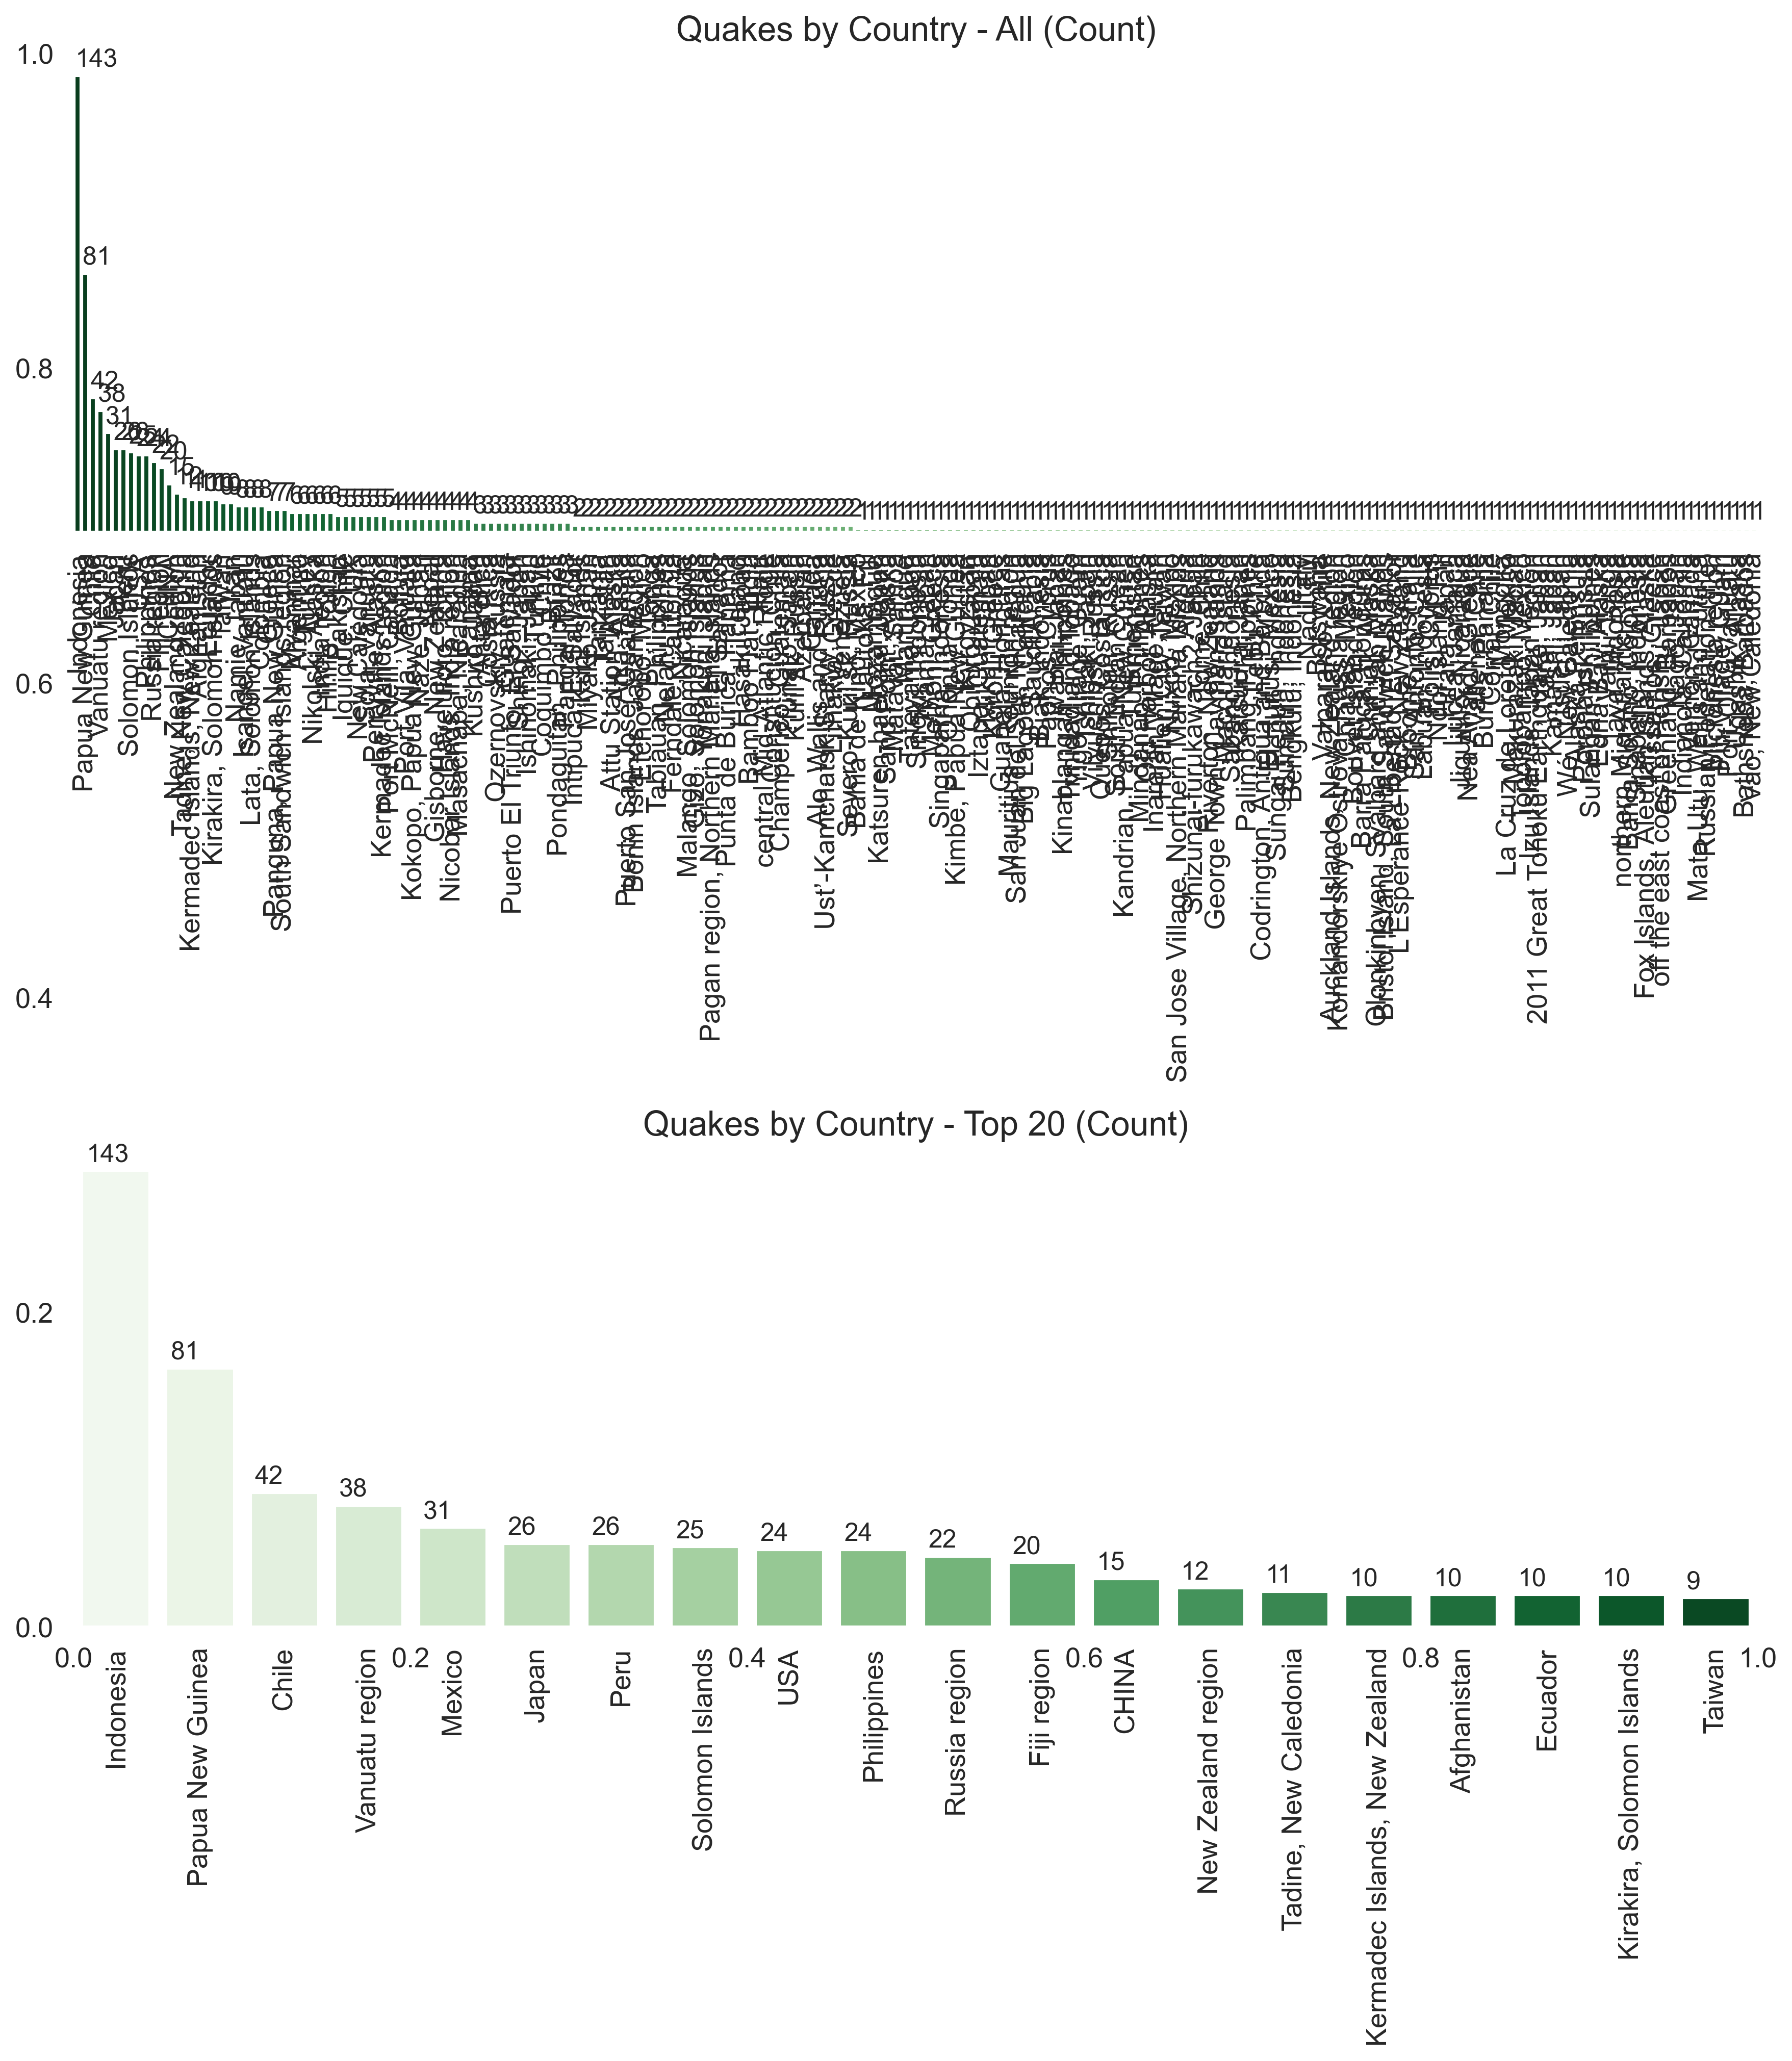

In [50]:
## Now We plot country-wise data with barplots for all the countries and for top 20 countries

plt.subplots(figsize=(12,14))

plt.subplot(211)
plt.title('Quakes by Country - All (Count)', fontsize=16)
ax = sns.countplot(x=df_country['country'], palette='Greens_r', alpha=1, order=df_country['country'].value_counts().index)

for p in ax.patches: 
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+3))

plt.xticks(rotation=90), plt.xlabel(None), plt.ylabel(None), plt.yticks([])

plt.subplot(212)
plt.title('Quakes by Country - Top 20 (Count)', fontsize=16)
ax = sns.countplot(x=df_country['country'], palette='Greens', alpha=1, order=df_country['country'].value_counts().head(20).index)

for p in ax.patches: 
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+3))

plt.xticks(rotation=90), plt.xlabel(None), plt.ylabel(None), plt.yticks([])

plt.show()

In [ ]:
pip install folium

In [37]:
import folium
from folium import plugins

In [23]:
## Indonesia Earthquake Heat Map
print("Earthquakes in Indonesia  -  Heat Map")
heat_map = df[["latitude", "longitude"]].values
Indonesia = folium.Map(location=[0, 105], zoom_start=4)
Indonesia.add_child(plugins.HeatMap(heat_map, min_opacity=0.3, radius=15))
Indonesia


Earthquakes in Indonesia  -  Heat Map


In [39]:
## Japan Heat Earthquake Map
print("Earthquakes in Japan  -  Heat Map")
japan = folium.Map(location=[38, 140], zoom_start=4)
japan.add_child(plugins.HeatMap(heat_map, min_opacity=0.3, radius=15))
japan

Earthquakes in Japan  -  Heat Map


In [40]:
## Papua New Guinea Earthquake Heat Map
print("Earthquakes in Papua New Guinea  -  Heat Map")
papua_new_guinea = folium.Map(location=[2, 150], zoom_start=4)
papua_new_guinea.add_child(plugins.HeatMap(heat_map, min_opacity=0.3, radius=15))
papua_new_guinea

Earthquakes in Papua New Guinea  -  Heat Map


**Top 3 Earthquake Prone Countries - Analyst's Perspective in Brief**

- **Indonesia** suffered **atleast 1 earthquake** of magnitude 6.5 and above, **every year between 2001-2022**. 
- A majority quakes are non-tsunami quakes, i.e., occuring on land, whereass **tsunami quakaes** accounted for just around **10%** of total quakes in the country since 2001.
- The year 2007 was the year of earthquakes for Indonesia as **around 13 quakes** have occured during that year. 
- Majority quakes in Indonesia are of magnitude 6.5 and 6.7.


- **Japan** had most number of quakes in 2011 (including the **Fukushima** quake). 
- **Tsunami quakes** accounte for around **25%** of total quakes in Japan.


- In **Papua New Guinea**,  tsunami quakes are most common and represent **over 51% share** in total quakes. 
- So far, Papua New Guinea has **never experienced quakes above 8 magnitude**.

In [41]:
## We will conclude the notebook by visualising the worldwide earthquake events by latitude and longitude
print("Earthquakes Across the World  -  Heat Map")
world = folium.Map(location=[df["latitude"].mean(), df["longitude"].mean()], zoom_start=2)
heat_map = df[["latitude", "longitude"]].values
world.add_child(plugins.HeatMap(heat_map, min_opacity=0.3, radius=13))
world

Earthquakes Across the World  -  Heat Map


**Key Observations**

- Most earthquakes have occured at coastal areas, and in the oceans and seas. 
- More specifically, quake events have predominantly taken place in **Pacific Oecan** and surrounding regions. 
- Not many earthquakes have occured in interior parts, compared to seaside areas.